## Installations and Importing

In [ ]:
!pip3 install roboticstoolbox-python

### Installation and importing 

In [7]:

import math
from spatialmath.base import *
from spatialmath import SE3
import spatialmath.base.symbolic as sym
import numpy as np

## Robotic Arm Model PUMA-560

In [ ]:
## Printing its DH table
p560 = rtb.models.DH.Puma560()
print(p560)


DHRobot: Puma 560 (by Unimation), 6 joints (RRRRRR), dynamics, geometry, standard DH parameters
┏━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┓
┃θⱼ  ┃   dⱼ   ┃   aⱼ   ┃   ⍺ⱼ   ┃   q⁻    ┃   q⁺   ┃
┣━━━━╋━━━━━━━━╋━━━━━━━━╋━━━━━━━━╋━━━━━━━━━╋━━━━━━━━┫
┃ q1 ┃ 0.6718 ┃      0 ┃  90.0° ┃ -160.0° ┃ 160.0° ┃
┃ q2 ┃      0 ┃ 0.4318 ┃   0.0° ┃ -110.0° ┃ 110.0° ┃
┃ q3 ┃   0.15 ┃ 0.0203 ┃ -90.0° ┃ -135.0° ┃ 135.0° ┃
┃ q4 ┃ 0.4318 ┃      0 ┃  90.0° ┃ -266.0° ┃ 266.0° ┃
┃ q5 ┃      0 ┃      0 ┃ -90.0° ┃ -100.0° ┃ 100.0° ┃
┃ q6 ┃      0 ┃      0 ┃   0.0° ┃ -266.0° ┃ 266.0° ┃
┗━━━━┻━━━━━━━━┻━━━━━━━━┻━━━━━━━━┻━━━━━━━━━┻━━━━━━━━┛

┌─────┬─────┬──────┬───────┬─────┬──────┬─────┐
│name │ q0  │ q1   │ q2    │ q3  │ q4   │ q5  │
├─────┼─────┼──────┼───────┼─────┼──────┼─────┤
│  qz │  0° │  0°  │  0°   │  0° │  0°  │  0° │
│  qr │  0° │  90° │ -90°  │  0° │  0°  │  0° │
│  qs │  0° │  0°  │ -90°  │  0° │  0°  │  0° │
│  qn │  0° │  45° │  180° │  0° │  45° │  0° │
└─────┴─────┴──────┴───────┴─────┴───

### Forward Kinematics

In [ ]:
p560.fkine([0, 0, 0, 0, 0, 0])    # solving the forward kinematic on given angles. 

   1         0         0         0.4521    
   0         1         0        -0.15      
   0         0         1         1.104     
   0         0         0         1         


In [ ]:
q=[40, 50, 0,90, 0, 10]
p560.fkine(q)    # solving the forward kinematic on given angles. 

  -0.1777   -0.9684   -0.175    -0.2547    
   0.9577   -0.211     0.1955    0.5096    
  -0.2263   -0.1329    0.965     0.9699    
   0         0         0         1         


### Inverse Kinematics 

In [ ]:
point = SE3(0.6, -0.5, 0.0)
point_sol = p560.ikine_LM(point) 
point_sol

IKsolution(q=array([-4.67094807e-01, -7.23326178e-01, -1.52381841e+00, -5.19995563e-13,  2.24714459e+00,  4.67094807e-01]), success=False, reason='rejected-step limit 100 exceeded', iterations=162, residual=0.15321261309848705)

### Trajectory Generation

In [ ]:
p560 = rtb.models.DH.Puma560()
t = np.arange(0, 2, 0.010) # creating 200 steps
point_1 = SE3(0.6, -0.5, 0.0) ## starting point in 3D space
point_2 = SE3(0.4, 0.5, 0.2)## ending point in 3D space
Ts = rtb.tools.trajectory.ctraj(point_1, point_2, len(t)) ## Calculating trajectory between points
sol = p560.ikine_LM(Ts) ## Generating Inverse kinematics solution for 200 points
print("Each row contains 6 joint angles and we have 200 of them" )
sol.q.shape 

Each row contains 6 joint angles and we have 200 of them


(200, 6)

### Making things Symbolic for **Generating Equations**

In [ ]:
p560_symblic = rtb.models.DH.Puma560(symbolic=True)
# Creating Symbolic variables for angles -> to obtain equations 
q = sym.symbol('q_:6') 
print(q)

In [ ]:
symbolic_trasformation_matrix = p560_symblic.fkine(q)

In [ ]:
T_simplified = symbolic_trasformation_matrix.simplify()
simplified_transformation_matrix = Matrix(T_simplified.A)
simplified_transformation_matrix

In [ ]:
## To Extract only the translation part
simplified_transformation_matrix[:3,3] 


------------------------------------------------------------------------------------

## Franka Emika Panda Robot

### Forward Kinematics


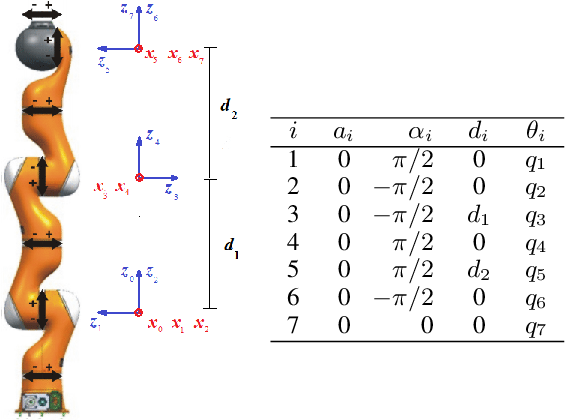


[Reference Link](https://www.semanticscholar.org/paper/Extracting-feasible-robot-parameters-from-dynamic-Gaz-Flacco/9daa694e11d9d62fa7fbce5c36b854a6a9413237/figure/1)

In [37]:
panda = rtb.models.URDF.Panda()
print(panda)
T = panda.fkine(panda.qz, end='panda_hand')
print(T)

ERobot: UR3 (by Universal Robotics), 6 joints (RRRRRR), 3 branches, dynamics, geometry, collision
┌───┬────────────────┬───────┬────────────────┬───────────────────────────────────────────────────────────────────────┐
│id │      link      │ joint │     parent     │                                  ETS                                  │
├───┼────────────────┼───────┼────────────────┼───────────────────────────────────────────────────────────────────────┤
│11 │ world          │       │ BASE           │ {world} = {BASE}                                                      │
│ 1 │ base_link      │       │ world          │ {base_link} = {world}                                                 │
│ 2 │ shoulder_link  │     0 │ base_link      │ {shoulder_link} = {base_link} ⊕ tz(0.1519) ⊕ Rz(q0)                   │
│ 3 │ upper_arm_link │     1 │ shoulder_link  │ {upper_arm_link} = {shoulder_link} ⊕ ty(0.1198) ⊕ Ry(90°) ⊕ Ry(q1)    │
│ 4 │ forearm_link   │     2 │ upper_arm_link │ {forearm_link}

In [40]:
T=panda.fkine(point_sol[0])
print("Transformation matrix containing same translation part\n")
print(T)


Inverse Kinematics Solution :
 [-1.13735079e+00 -3.23407754e+05 -3.23408114e+05 -3.23405241e+05 -4.42905897e-01 -3.23408197e+05]


In [34]:
angles=np.array([30,00,0,0,0,0,0])
angles_rad=np.radians(angles)
print(angles_rad)
T=panda.fkine(angles_rad)
print("Transformation Matrix :\n",T)

[1.04719755 0.         0.         0.         0.         0.        ]
Transformation Matrix :
   -0.5      -0.866     0         0.1312    
  -0.866     0.5       0         0.4519    
   0         0        -1         0.06655   
   0         0         0         1         



### Inverse Kinematics Solver

In [ ]:
point = SE3(0.6, -0.5, 0.0)
point_sol = panda.ikine_LM(point) 
print("\nInverse Kinematics Solution :\n" ,point_sol)


# Custom Robotic Arm Kinematics

## Bazu Robotic Arm

### Forward Kinematics

In [ ]:
## Creating Robotic arm through defining links and Serial Linkage
Link_1=rtb.DHLink(0.5, math.pi/2, 0, 0)
Link_2=rtb.DHLink(0,    0,   0, 0.4)
Link_3=rtb.DHLink(0,    0,   0, 0.4)
bazu_robot= rtb.DHRobot([Link_1 ,Link_2,Link_3])
bazu_robot

DHRobot: noname, 3 joints (RRR), dynamics, standard DH parameters
┏━━━━┳━━━━━┳━━━━━┳━━━━━━━┓
┃θⱼ  ┃ dⱼ  ┃ aⱼ  ┃  ⍺ⱼ   ┃
┣━━━━╋━━━━━╋━━━━━╋━━━━━━━┫
┃ q1 ┃ 0.5 ┃   0 ┃ 90.0° ┃
┃ q2 ┃   0 ┃ 0.4 ┃  0.0° ┃
┃ q3 ┃   0 ┃ 0.4 ┃  0.0° ┃
┗━━━━┻━━━━━┻━━━━━┻━━━━━━━┛

In [ ]:
##Forward Kinematics

q1=50
q2=30
q3=0

T=bazu_robot.fkine([math.radians(q1),math.radians(q2),math.radians(q3)])

print("Transformation Matrix :\n",T)

Transformation Matrix :
    0.5567   -0.3214    0.766     0.4453    
   0.6634   -0.383    -0.6428    0.5307    
   0.5       0.866     0         0.9       
   0         0         0         1         



### Inverse Kinematics

In [ ]:
# Selection a point to get inverse kinematics solution as angles 
print("point-> x: %2.2f ,y: %2.2f ,z: %2.2f" %(1.5,2.5,2.3) )
point = SE3( 0.4453 , 0.5307 , 0.9  )
point_sol = bazu_robot.ikine_LM(point) 
print(point_sol)

point-> x: 1.50 ,y: 2.50 ,z: 2.30
IKsolution(q=array([ 0.59415051,  1.0801696 , -1.47551611]), success=False, reason='rejected-step limit 100 exceeded', iterations=113, residual=1.0432837034383884)


### Making things symbolic for implementation

In [ ]:
L = sym.symbol('l_1:4') # Symbolics for links
print("symblic Links : ",L)
Link_1=rtb.DHLink(L[0], math.pi/2, 0, 0) 
Link_2=rtb.DHLink(0,    0,   0, L[1])
Link_3=rtb.DHLink(0,    0,   0, L[2])
Kaka_robot_symbolic= rtb.DHRobot([Link_1 ,Link_2,Link_3])

symblic Links :  (l_1, l_2, l_3)


In [ ]:
Q= sym.symbol('q1:4')   # Symbolics for rotations angles
print("symblic Angles : ",Q)

symblic Angles :  (q1, q2, q3)


In [ ]:
point = SE3(0.6, -0.5, 0.0)
# point_sol = puma.ikine_LM(point) 
T_symbolic=Kaka_robot_symbolic.fkine(Q)
T_symbolic

  (-6.12323399573677e-17*sin(q1)*sin(q2) + cos(q1)*cos(q2))*cos(q3) + (-6.12323399573677e-17*sin(q1)*cos(q2) - 1.0*sin(q2)*cos(q1))*sin(q3) -1.0*(-6.12323399573677e-17*sin(q1)*sin(q2) + cos(q1)*cos(q2))*sin(q3) + 1.0*(-6.12323399573677e-17*sin(q1)*cos(q2) - 1.0*sin(q2)*cos(q1))*cos(q3) 1.0*sin(q1)  -6.12323399573677e-17*l_2*sin(q1)*sin(q2) + l_2*cos(q1)*cos(q2) + l_3*(-6.12323399573677e-17*sin(q1)*sin(q2) + cos(q1)*cos(q2))*cos(q3) + l_3*(-6.12323399573677e-17*sin(q1)*cos(q2) - 1.0*sin(q2)*cos(q1))*sin(q3)  
  (-1.0*sin(q1)*sin(q2) + 6.12323399573677e-17*cos(q1)*cos(q2))*sin(q3) + (sin(q1)*cos(q2) + 6.12323399573677e-17*sin(q2)*cos(q1))*cos(q3) 1.0*(-1.0*sin(q1)*sin(q2) + 6.12323399573677e-17*cos(q1)*cos(q2))*cos(q3) - 1.0*(sin(q1)*cos(q2) + 6.12323399573677e-17*sin(q2)*cos(q1))*sin(q3) -1.0*cos(q1) l_2*sin(q1)*cos(q2) + 6.12323399573677e-17*l_2*sin(q2)*cos(q1) + l_3*(-1.0*sin(q1)*sin(q2) + 6.12323399573677e-17*cos(q1)*cos(q2))*sin(q3) + l_3*(sin(q1)*cos(q2) + 6.12323399573677e-17*sin(

In [ ]:
Ts_symbolic = T_symbolic.simplify()
M = Matrix(Ts_symbolic.A)
M

Matrix([
[1.0*cos(q1)*cos(q2 + q3), -1.0*sin(q2 + q3)*cos(q1),          1.0*sin(q1), -6.12323399573677e-17*l_2*sin(q1)*sin(q2) + 1.0*l_2*cos(q1)*cos(q2) + 1.0*l_3*cos(q1)*cos(q2 + q3)],
[1.0*sin(q1)*cos(q2 + q3), -1.0*sin(q1)*sin(q2 + q3),         -1.0*cos(q1),  1.0*l_2*sin(q1)*cos(q2) + 6.12323399573677e-17*l_2*sin(q2)*cos(q1) + 1.0*l_3*sin(q1)*cos(q2 + q3)],
[        1.0*sin(q2 + q3),          1.0*cos(q2 + q3), 6.12323399573677e-17,                                                   1.0*l_1 + 1.0*l_2*sin(q2) + 1.0*l_3*sin(q2 + q3)],
[                       0,                         0,                    0,                                                                                                  1]])

In [ ]:
M[:3,3] # extracting translation part

Matrix([
[-6.12323399573677e-17*l_2*sin(q1)*sin(q2) + 1.0*l_2*cos(q1)*cos(q2) + 1.0*l_3*cos(q1)*cos(q2 + q3)],
[ 1.0*l_2*sin(q1)*cos(q2) + 6.12323399573677e-17*l_2*sin(q2)*cos(q1) + 1.0*l_3*sin(q1)*cos(q2 + q3)],
[                                                  1.0*l_1 + 1.0*l_2*sin(q2) + 1.0*l_3*sin(q2 + q3)]])

In [ ]:
T=Kaka_robot.fkine([40,30,10])  # NON symbolic
T

   0.4448    0.4969    0.7451    3.59      
  -0.4969   -0.5552    0.6669   -4.011     
   0.7451   -0.6669    0         12.32     
   0         0         0         1         


**OUR FINAL RESULTS TO IMPLEMENT IN CODE**

- X = l_2*cos(q1)*cos(q2) + l_3*cos(q1)*cos(q2 + q3)
- Y = l_2*sin(q1)*cos(q2) + l_3*sin(q1)*cos(q2 + q3)
- Z = l_1 + l_2*sin(q2)   + l_3*sin(q2 + q3)

## Testing URDF

In [ ]:
import roboticstoolbox as rtb
robot = rtb.models.DH.Panda()
print(robot)
T = robot.fkine(robot.qz)  # forward kinematics
print(T)

In [21]:
from spatialmath import SE3

T = SE3(0.7, 0.2, 0.1) * SE3.OA([0, 1, 0], [0, 0, -1])
sol = robot.ikine_LM(T)         # solve IK
print(sol)
q_pickup = sol.q
print(robot.fkine(q_pickup))

IKsolution(q=array([ 0.21343385,  1.8669104 , -0.22639717,  0.48252627,  0.2197902 ,  1.3958973 , -2.03679145]), success=True, reason=None, iterations=12, residual=1.4517611973679024e-11)
  -1         9.436e-14  2.439e-12  0.7       
   9.445e-14  1         7.257e-13  0.2       
  -2.439e-12  7.257e-13 -1         0.1       
   0         0         0         1         



In [26]:
theta = np.array([0., 0., -0.25 * pi, 0., 0., 0.])
f = robot.forward(theta)

ERobot: panda (by Franka Emika), 7 joints (RRRRRRR), geometry, collision
┌───┬──────────────┬───────┬─────────────┬─────────────────────────────────────────────────────────────────────────────┐
│id │     link     │ joint │   parent    │                                     ETS                                     │
├───┼──────────────┼───────┼─────────────┼─────────────────────────────────────────────────────────────────────────────┤
│ 1 │ panda_link0  │       │ BASE        │ {panda_link0} = {BASE}                                                      │
│ 2 │ panda_link1  │     0 │ panda_link0 │ {panda_link1} = {panda_link0} ⊕ tz(0.333) ⊕ Rz(q0)                          │
│ 3 │ panda_link2  │     1 │ panda_link1 │ {panda_link2} = {panda_link1} ⊕ Rx(-90°) ⊕ Rz(q1)                           │
│ 4 │ panda_link3  │     2 │ panda_link2 │ {panda_link3} = {panda_link2} ⊕ ty(-0.316) ⊕ Rx(90°) ⊕ Rz(q2)               │
│ 5 │ panda_link4  │     3 │ panda_link3 │ {panda_link4} = {panda_link3} ⊕ tx(0.

ModuleNotFoundError: ignored

In [ ]:
print("-------forward-------")
print("end frame t_4_4:")
print(f.t_4_4)
print("end frame xyz:")
print(f.t_3_1.reshape([3, ]))
print("end frame abc:")
print(f.euler_3)
print("end frame rotational matrix:")
print(f.r_3_3)
print("end frame quaternion:")
print(f.q_4)
print("end frame angle-axis:")
print(f.r_3)

-------forward-------
end frame t_4_4:
[[ 7.07106781e-01 -7.07106781e-01 -2.09060286e-16 -4.97096067e-01]
 [-1.65762483e-16  1.29893408e-16 -1.00000000e+00 -2.95300000e-01]
 [ 7.07106781e-01  7.07106781e-01 -2.53632657e-17  1.29209607e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]
end frame xyz:
[-0.49709607 -0.2953      1.29209607]
end frame abc:
[-1.57009246e-16 -7.85398163e-01  1.57079633e+00]
end frame rotational matrix:
[[ 7.07106781e-01 -7.07106781e-01 -2.09060286e-16]
 [-1.65762483e-16  1.29893408e-16 -1.00000000e+00]
 [ 7.07106781e-01  7.07106781e-01 -2.53632657e-17]]
end frame quaternion:
[ 0.65328148 -0.27059805  0.27059805  0.65328148]
end frame angle-axis:
[ 1.48218982 -0.61394313  0.61394313]


In [ ]:
xyz = np.array([[0.28127], [0.], [1.13182]])
abc = np.array([0.5 * pi, 0., pi])
end = Frame.from_euler_3(abc, xyz)
robot.inverse(end)
print("inverse is successful: {0}".format(robot.is_reachable_inverse))
print("axis values: \n{0}".format(robot.axis_values))
robot.show()

array([ 0.79760367, -0.72234533, -0.92168697,  1.37145959, -1.57072942,
       -2.34399122])

In [ ]:
print("inverse is successful: {0}".format(robot.is_reachable_inverse))
print("axis values: \n{0}".format(robot.axis_values))
robot.show()

inverse is successful: True
axis values: 
[ 0.79760367 -0.72234533 -0.92168697  1.37145959 -1.57072942 -2.34399122]


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)
